# The residuals plot in the paper.

In [1]:
%matplotlib inline

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import gridspec

plotpar = {'axes.labelsize': 16,
           'font.size': 22,
           'legend.fontsize': 15,
           'xtick.labelsize': 15,
           'ytick.labelsize': 15,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Load the data file.

In [3]:
df = pd.read_csv("../kepler_kinematics/gaia_kepler_lamost.csv")

/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,20,21,22,28,30,54,55,56,74,76,155,156,176) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Load the results file.

In [4]:
results = pd.read_csv("../data/all_kepler.csv")

In [10]:
results

,Unnamed: 0,Unnamed: 0.1,kepid,vx_inferred,vx_inferred_errp,vx_inferred_errm,vx_inferred_err,vy_inferred,vy_inferred_errp,vy_inferred_errm,vy_inferred_err,vz_inferred,vz_inferred_errp,vz_inferred_errm,vz_inferred_err,lndistance_inferred,lndistance_inferred_errp,lndistance_inferred_errm,lndistance_inferred_err
0,0,0,1028267,160.332817,8.162401,8.253087,8.170746,205.684173,18.687313,17.270113,18.295205,16.174239,3.348044,3.189413,3.298085,0.637205,0.029279,0.027367,0.028377
1,0,0,1718222,-11.845362,6.528122,6.745293,6.739177,229.468462,17.812779,18.064858,18.174759,3.494132,3.427507,3.504792,3.523040,-1.420472,0.008761,0.009172,0.009133
2,0,0,1295017,135.637921,10.521317,10.435788,10.599440,208.903255,17.323011,17.894558,17.850732,13.076332,3.324339,3.316788,3.354047,1.441238,0.061438,0.059865,0.062138
3,0,0,1433899,-2.655235,6.593350,6.629758,6.567670,225.567224,18.062198,17.655755,17.835659,5.794450,3.218170,3.146975,3.179605,-0.108288,0.029274,0.027127,0.028317
4,0,0,1872349,21.206015,6.606025,6.381051,6.489045,229.141272,18.262806,17.839974,18.105402,-11.492240,3.209948,3.074008,3.131917,-0.344758,0.017483,0.016592,0.017168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0,1726211,187.188745,8.454146,8.242298,8.532376,215.747493,18.458498,17.886519,18.351558,-18.183963,3.130426,3.182216,3.182796,0.259769,0.029399,0.029549,0.029593
1040,0,0,1433622,79.273633,6.703548,7.058907,6.904123,226.305751,17.848152,19.427670,18.562788,-19.410422,3.172407,3.520604,3.338046,-0.052262,0.013437,0.013593,0.013559
1041,0,0,1571298,9.709398,6.785142,6.473126,6.872166,223.137161,18.389848,17.487392,18.502812,11.919869,3.481983,3.348268,3.521543,-0.492595,0.018252,0.017581,0.017966
1042,0,0,1868233,41.219445,6.549368,6.443416,6.522549,225.198074,18.053364,17.620937,17.935528,-0.828832,3.331162,3.278515,3.318202,-0.885036,0.009146,0.008832,0.009036


Merge the results file and the data file.

In [6]:
adf = pd.merge(df, results, on="kepid", how="right")

In [28]:
def resid_plot(vx, vy, vz, vx_inferred, vy_inferred, vz_inferred, vx_inferred_err, vy_inferred_err, vz_inferred_err,
               r_est, lndistance_inferred,
               ms=4, alpha=.1, box_size=150):

    fig = plt.figure(figsize=(16, 6), dpi=200)
#     gs = gridspec.GridSpec(2, 3, hspace=.0, wspace=.3, height_ratios=[1, 1])
    gs = gridspec.GridSpec(2, 4, hspace=.0, wspace=.4, height_ratios=[1, 1])

    ax0 = plt.subplot(gs[0, 0])
    xlims = (np.median(vx) - box_size, np.median(vx_inferred) + box_size)
    ax0.plot(vx, vx_inferred, "k.", ms=ms, alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(xlims[0], xlims[1], 100)
    plt.plot(xs, xs, "k", ls="--", zorder=1)
    ax0.set_ylim(xlims)
    ax0.set_xlim(xlims)
    ax0.set_ylabel("$\mathrm{V_x~inferred~[kms^{-1}]}$")
    ax0.set_xticklabels([])

    ax1 = plt.subplot(gs[0, 1])
    ylims = (np.median(vy) - box_size, np.median(vy_inferred) + box_size)
    ax1.plot(vy, vy_inferred, "k.", ms=ms, alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(ylims[0], ylims[1], 100)
    plt.plot(xs, xs, "k", ls="--", zorder=1)
    ax1.set_xlim(ylims)
    ax1.set_ylim(ylims)
    ax1.set_ylabel("$\mathrm{V_y~inferred~[kms^{-1}]}$")
    ax1.set_xticklabels([])

    ax2 = plt.subplot(gs[0, 2])
    zlims = (np.median(vz) - box_size, np.median(vz_inferred) + box_size)
    ax2.plot(vz, vz_inferred, "k.", ms=ms, alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(zlims[0], zlims[1], 100)
    plt.plot(xs, xs, "k", ls="--", zorder=1)
    ax2.set_xlim(zlims)
    ax2.set_ylim(zlims)
    ax2.set_ylabel("$\mathrm{V_z~inferred~[kms^{-1}]}$");
    ax2.set_xticklabels([])

    ax6 = plt.subplot(gs[0, 3])
    ax6.plot(r_est, lndistance_inferred, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(min(lndistance_inferred), max(lndistance_inferred), 100)
    ax6.plot(xs, xs, "k", ls="--", zorder=1)
    
    # Residual panels
    # ---------------------------------------------------------------------------------------------------
    
    ax3 = plt.subplot(gs[1, 0])
    ax3.plot(vx, vx_inferred - vx, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax3.errorbar(np.median(vx - 40), -30, yerr=np.median(vx_inferred_err), fmt="k.", label="$\mathrm{Typical~uncertainty}$")
    ax3.axhline(0, color="k", ls="--", zorder=1)
    ax3.set_ylim(-box_size, box_size)
    ax3.set_xlim(xlims)
    ax3.set_xlabel("$\mathrm{V_x~true~[kms^{-1}]}$")
    ax3.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")
    ax3.legend()

    ax4 = plt.subplot(gs[1, 1])
    ax4.plot(vy, vy_inferred - vy, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax4.errorbar(np.median(vy - 40), -30, yerr=np.median(vy_inferred_err), fmt="k.")
    ax4.axhline(0, color="k", ls="--", zorder=1)
    ax4.set_ylim(-box_size, box_size)
    ax4.set_xlim(ylims)
    ax4.set_xlabel("$\mathrm{V_y~true~[ks^{-1}]}$")
    ax4.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")

    ax5 = plt.subplot(gs[1, 2])
    ax5.plot(vz, vz_inferred - vz, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax5.errorbar(np.median(vz - 40), -30, yerr=np.median(vz_inferred_err), fmt="k.")
    print("typical vz uncertainty = ", np.median(vz_inferred_err), np.median(vz_inferred_err/vz)*100)
    ax5.axhline(0, color="k", ls="--", zorder=1)
    ax5.set_ylim(-box_size, box_size)
    ax5.set_xlim(zlims)
    ax5.set_xlabel("$\mathrm{V_z~true~[ks^{-1}]}$")
    ax5.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")

    ax6 = plt.subplot(gs[1, 3])
    ax6.plot(r_est, lndistance_inferred-r_est, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax6.axhline(0, color="k", ls="--", zorder=1)
    ax6.set_ylim(-.5, .5)
        
    return fig

In [29]:
adf.r_est.values[:10], np.exp(adf.lndistance_inferred.values[:10])*1e3

(array([ 349.20002016,  545.4509268 , 1180.83756535, 1178.93700466,
        2200.95619215, 1916.49166685, 3165.83564499, 2467.62477095,
         573.09538574,  256.10008214]),
 array([ 352.76538221,  554.20696413, 1216.97486878, 1220.42725062,
        2229.448654  , 2026.87119433, 3302.5992854 , 2568.7445025 ,
         583.11430052,  258.09176819]))

typical vz uncertainty =  3.366654709322134 5.703328448905253


/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys


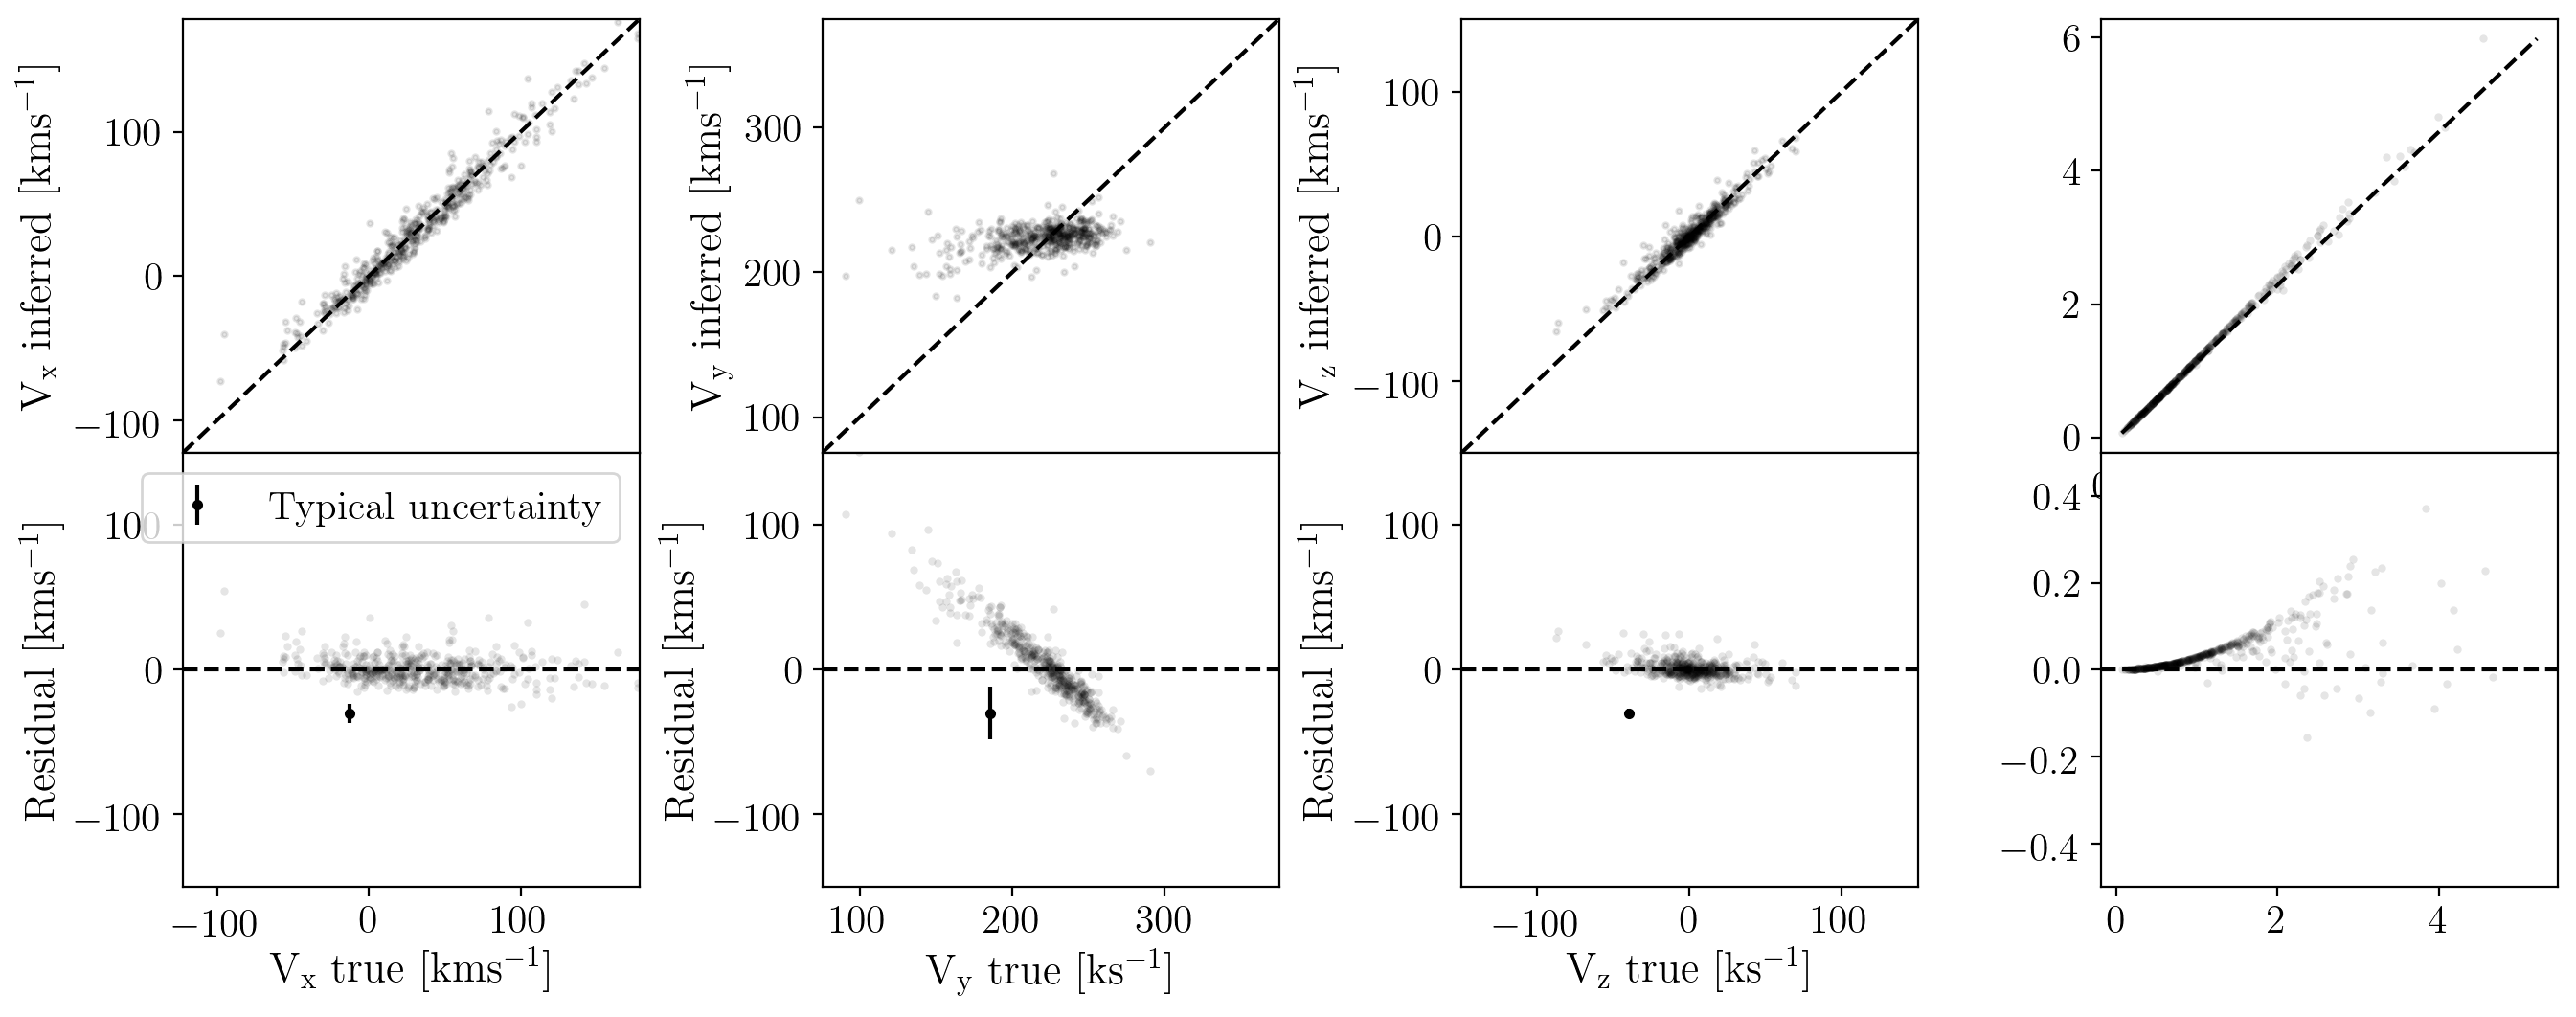

In [30]:
m = np.isfinite(adf.vx.values) & np.isfinite(adf.vy.values) & np.isfinite(adf.vz.values)
fig = resid_plot(adf.vx.values[m], adf.vy.values[m], adf.vz.values[m], adf.vx_inferred.values[m],
                 adf.vy_inferred.values[m], adf.vz_inferred.values[m], adf.vx_inferred_err.values[m],
                 adf.vy_inferred_err.values[m], adf.vz_inferred_err.values[m],
                 adf.r_est.values[m]*1e-3, np.exp(adf.lndistance_inferred.values[m]))

plt.tight_layout()
# plt.savefig("../plots/residuals")
# plt.savefig("../paper/residuals.pdf")